###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license. (c)2014 Lorena A. Barba, Olivier Mesnard. Thanks: NSF for support via CAREER award #1149784.

# Method of images

In the previous _AeroPython_ lessons, you've seen how the fundamental solutions of potential flow can be combined to produce stream-line patterns that represent flow around objects—e.g., a [Rankine oval](02_Lesson02_sourceSinkFreestream.ipynb) and  a [circular cylinder](03_Lesson03_doublet.ipynb).

You may ask now: can we get flow around a straight wall? Yes, we can!

The method of images is simply this: put a singularity near a "wall" by adding an "image" singularity on the other side of the wall.
Sometimes, this is also referred to as *aerodynamic interferences*. 

In addition to that, this notebook also gives us the opportunity to introduce the notion of **classes** in Python. This is a very useful way to organize your code, that becomes crucial as programs get more complex.

As usual, we will start by importing the libraries and creating the computational grid. Let's get that out of the way.

In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

## Source near a plane wall

If a source is located near a wall, the flow pattern will be distorted by the wall. Imagine a source located at $y=y_\text{source}$ next to a wall at $y=0$. The boundary condition at the wall requires the flow to be tangent there—for a horizontal wall, $v=0$. The effect of the wall on the source flow is identical to placing another source (an image) of equal strength, located at $y=-y_\text{source}$.

Ok, now it is time to play smart and avoid repeating code that is wasting our precious time! In a previous notebook, we already introduced the notion of function in Python, and now we are going to move forward with the creation of **classes**.

A class is a bundle of data (parameters and variables) and "methods" or functions that work with this data. It's a very tidy way of organizing code. As we create longer and more complex codes, this helps us manage complexity. The code becomes easier to maintain, modify and extend.

We will define a class called `Source` that will contain information related to a source. A singularity such as a source is defined by its strength and its location in the domain. Therefore, our class `Source` will have three `attributes` defining it:

* `strength`: the strength of the source.
* `x`: the location of the source on the $x$-axis.
* `y`: the location of the source on the $y$-axis.

What would we like to do after the definition of our source? We want to compute the velocity field, as well as the stream function. So, in our class `Source`, we have to implement two methods (functions included in a class): one to compute the velocity (a function called `velocity`) and the other one to calculate the stream function (a function called `stream_function`).

Let's have a detailed look of the methods:

* method `velocity`: is a function used to calculate the velocity on the mesh (`X`,`Y`) due to a source. Therefore, our method will have two input arguments, `X` and `Y`, and return `u` and `v`, the velocity components of the source.
* method `stream_function`: is a function used to calculate the stream function on the mesh (`X`,`Y`) due to a source. Therefore, our method will have two input arguments, `X` and `Y`, and return `psi`, the stream function of the source.

In addition to these two, every class needs to have a *constructor*, which is simply a fancy word for initializing the data. It is a function that is always called `__init__`:

In [3]:
class Source:
    """
    Contains information related to a source (or sink).
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the singularity.
        x: float
            x-coordinate of the singularity.
        y: float
            y-coordinate of the singularity.
        """
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        
        Returns
        -------
        u: 2D Numpy array of floats
            x-component of the velocity field generated by the source.
        v: 2D Numpy array of floats
            y-component of the velocity field generated by the source.
        """
        u = (self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
    
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        
        Returns
        -------
        psi: 2D Numpy array of floats
            Streamfunction generated by the source.
        """
        psi = (self.strength / (2 * math.pi) *
               numpy.arctan2((Y - self.y), (X - self.x)))
        return psi

What's this `self` business? When we call the class `Source`, it will look like a function call. For example: `source = Source(1, 0, 0)`, to create a source of strength 1 located at the origin. Python automatically calls the *constructor* function with the parameters `(self, 1, 0, 0)`, i.e., Python adds `self` to the list of parameters, to mean "the source that needs to be created now with the parameters that follow."

Once we've created a `source`, we can call its two methods to compute the velocity field and the stream function on the mesh (`X`,`Y`). Like when using libraries, we'll indicate the method of a class by using the dot notation (as shown below).

The Cartesian velocity components are given by:

$$u = \frac{\sigma}{2\pi}\frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

$$v = \frac{\sigma}{2\pi}\frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

and the stream function is defined by:

$$\psi = \frac{\sigma}{2\pi}\arctan\left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

Now, let's see how this works.

In [4]:
strength_source = 1.0                  # strength of the source         
x_source, y_source = 0.0, 0.5          # location of the source

# create a source (object of class Source) 
source = Source(strength_source, x_source, y_source)

# compute the velocity field and the stream-function on the mesh grid
u1, v1 = source.velocity(X, Y)
psi1 = source.stream_function(X, Y)

Notice the dot notation? With the dot, we are saying: "take the `velocity` function of the object `source` that we just created, and execute it." You see, the velocity function is associated to the data of the particular source, because it is part of a class.

The image of the source will also be created using the class `Source`, with the same strength but different location. You probably start to see the efficiency of having created a class.

In [5]:
# create the image of the source and computes velocity and stream-function
source_image = Source(strength_source, x_source, -y_source)
u2, v2 = source_image.velocity(X, Y)
psi2 = source_image.stream_function(X, Y)

Using superposition, we can compute the streamlines of a source in the vicinity of a wall. The superimposition of the two sources leads to the following velocity field:

$$u = \frac{\sigma}{2\pi} \left( \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2} + \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y+y_\text{source}\right)^2} \right)$$

$$v = \frac{\sigma}{2\pi} \left( \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2} + \frac{y+y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y+y_\text{source}\right)^2} \right)$$

and the following stream function:

$$\psi = \frac{\sigma}{2\pi} \left( \arctan\left(\frac{y-y_\text{source}}{x-x_\text{source}}\right) + \arctan\left(\frac{y+y_\text{source}}{x-x_\text{source}}\right) \right)$$

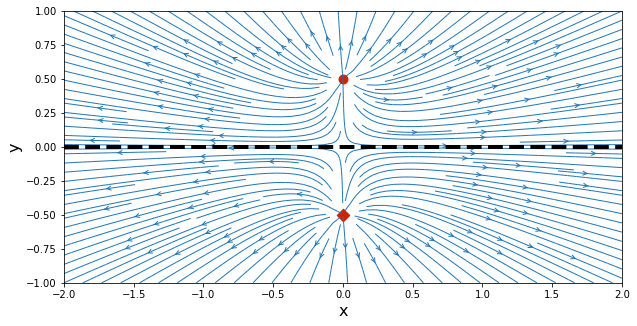

In [6]:
# superposition of the source and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Vortex near a plane wall

In a similar manner, we write another class called `Vortex`, requiring as data its strength and location. The class will have two methods: one to compute the velocity of the vortex and the other one to calculate the stream-function.

But we also always need a *constructor*, a function called `__init__`, to initialize the data of a vortex:

In [7]:
class Vortex:
    """
    Contains information related to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.
        
        Parameters
        ----------
        strength: float
            Strength of the vortex.
        x: float
            x-coordinate of the vortex.
        y: float
            y-coordinate of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        
        Returns
        -------
        u: 2D Numpy array of floats
            x-component of the velocity field generated by the vortex.
        v: 2D Numpy array of floats
            y-component of the velocity field generated by the vortex.
        """
        u = (+self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (-self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        
        Returns
        -------
        psi: 2D Numpy array of floats
            Streamfunction generated by the vortex.
        """
        psi = (-self.strength / (4 * math.pi) *
               numpy.log((X - self.x)**2 + (Y - self.y)**2))
        return psi

It is now very quick to create two object of type `Vortex` for a new vortex and its image.

In [8]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# create a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
u1, v1 = vortex.velocity(X, Y)
psi1 = vortex.stream_function(X, Y)

# create the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
u2, v2 = vortex_image.velocity(X, Y)
psi2 = vortex_image.stream_function(X, Y)

Applying the principle of superposition, we are able to get the streamlines representing a vortex near a wall.

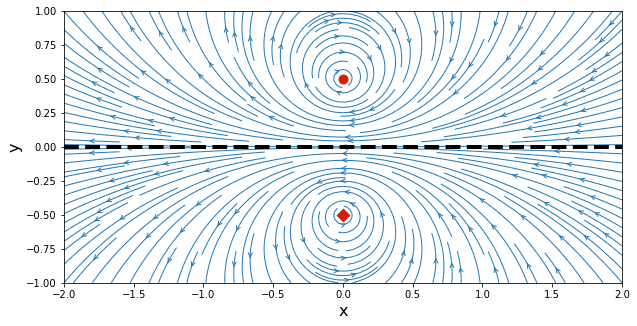

In [9]:
# superposition of the vortex and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Motion of a vortex pair near the ground

We're having too much fun. Let's get more singularities near a wall. Two vortices will make you dizzy ...

In [10]:
strength_vortex = 1.0                  # absolute value of each vortex strength
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

# create two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# compute the velocity and stream-function for each vortex
u1, v1 = vortex1.velocity(X, Y)
psi1 = vortex1.stream_function(X, Y)
u2, v2 = vortex2.velocity(X, Y)
psi2 = vortex2.stream_function(X, Y)

# create an image for each vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

# compute the velcoity and stream-function of each image
u3, v3 = vortex1_image.velocity(X, Y)
psi3 = vortex1_image.stream_function(X, Y)
u4, v4 = vortex2_image.velocity(X, Y)
psi4 = vortex2_image.stream_function(X, Y)

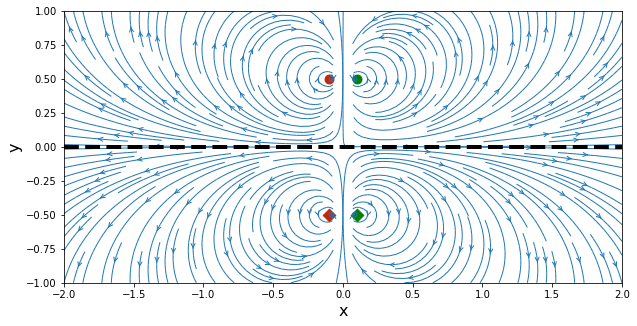

In [11]:
# superposition of the vortex pair and its image
u = u1 + u2 + u3 + u4
v = v1 + v2 + v3 + v4
psi = psi1 + psi2 + psi3 + psi4

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0.0, color='k', linestyle='--', linewidth=4);

## Doublet near a plane wall parallel to a uniform flow

Last one ... a doublet next to a wall. We need a new class, this time named `Doublet`. Same as before!

In [12]:
u_inf = 1.0    # free-stream speed

# calculate the velocity and stream-function of the free-stream flow
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [13]:
class Doublet:
    """
    Contains information related to a doublet.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the doublet.
        
        Parameters
        ----------
        strength: float
            Strength of the doublet.
        x: float
            x-coordinate of the doublet.
        y: float
            y-coordinate of the doublet.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
            
        Returns
        -------
        u: 2D Numpy array of floats
            x-component of the velocity field generated by the doublet.
        v: 2D Numpy array of floats
            y-component of the velocity field generated by the doublet.
        """
        u = (-self.strength / (2 * math.pi) *
             ((X - self.x)**2 - (Y - self.y)**2) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        v = (-self.strength / (2 * math.pi) *
             2 * (X - self.x) * (Y - self.y) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        return u, v
            
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        
        Returns
        -------
        psi: 2D Numpy array of floats
            Streamfunction generated by the doublet.
        """
        psi = (-self.strength / (2 * math.pi) *
               (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return psi

In [14]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

# create a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# compute the velocity and stream-function of the doublet on the mesh
u1, v1 = doublet.velocity(X, Y)
psi1 = doublet.stream_function(X, Y)

# create the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# compute the velocity and stream-function of the image on the mesh
u2, v2 = doublet_image.velocity(X, Y)
psi2 = doublet_image.stream_function(X, Y)

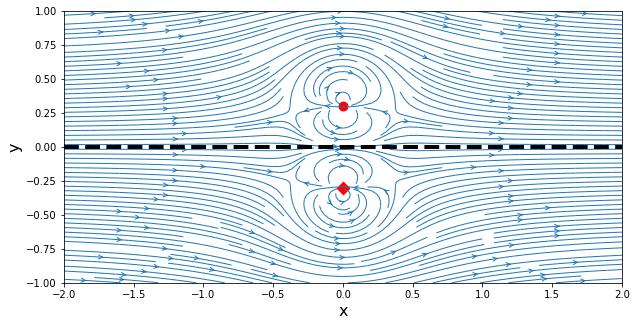

In [15]:
# superposition of the doublet and its image to the uniform flow
u = u_freestream + u1 + u2
v = v_freestream + v1 + v2
psi = psi_freestream + psi1 + psi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

---

In [16]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

FileNotFoundError: [Errno 2] No such file or directory: '../styles/custom.css'